In [537]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = shap.datasets.iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']


In [538]:
shap.initjs()

In [539]:
iris = sns.load_dataset('iris')

In [540]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [541]:
iris.loc[iris['species'] == 'setosa','species'] = 0
iris.loc[iris['species'] == 'versicolor','species'] = 1
iris.loc[iris['species'] == 'virginica','species'] = 2

In [542]:
y = iris['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: object

In [543]:
X = iris.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [544]:
# X_train, X_test, y_train, y_test = train_test_split(*shap.datasets.iris(), test_size=.2, random_state=12345) # train_test_split은 X,y 두개를 요구하므로, 데코레이터를 이용해 두개를 자동으로 나눠준다는 뜻을 전한다.

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

In [546]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
19,5.1,3.8,1.5,0.3
48,5.3,3.7,1.5,0.2
146,6.3,2.5,5.0,1.9
121,5.6,2.8,4.9,2.0
60,5.0,2.0,3.5,1.0
...,...,...,...,...
34,4.9,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
126,6.2,2.8,4.8,1.8
129,7.2,3.0,5.8,1.6


In [547]:
y_train

19     0
48     0
146    2
121    2
60     1
      ..
34     0
101    2
126    2
129    2
29     0
Name: species, Length: 120, dtype: object

In [548]:
rfc = RandomForestRegressor(random_state=12345,n_estimators=20 ,max_depth=3)

In [549]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
19,5.1,3.8,1.5,0.3
48,5.3,3.7,1.5,0.2
146,6.3,2.5,5.0,1.9
121,5.6,2.8,4.9,2.0
60,5.0,2.0,3.5,1.0
...,...,...,...,...
34,4.9,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
126,6.2,2.8,4.8,1.8
129,7.2,3.0,5.8,1.6


In [550]:
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=12345)

In [551]:
rfc.score(X_test, y_test)

0.9225856300160111

In [552]:
explainer = shap.TreeExplainer(rfc)

In [553]:
shap_value = explainer.shap_values(X_test)
shap_value

array([[ 4.36581423e-04, -1.71750322e-03,  1.30728413e-01,
        -1.58719064e-01],
       [ 8.66666667e-03, -4.04761905e-04, -4.96328029e-01,
        -5.51100542e-01],
       [ 4.36581423e-04, -1.71750322e-03,  1.77996346e-01,
         1.29013004e-01],
       [ 1.31547619e-03, -4.04761905e-04, -4.87429219e-01,
        -5.52648161e-01],
       [ 1.31547619e-03, -4.04761905e-04, -4.87429219e-01,
        -5.52648161e-01],
       [ 8.66666667e-03, -4.04761905e-04, -4.96328029e-01,
        -5.51100542e-01],
       [ 4.36581423e-04, -1.71750322e-03,  1.30728413e-01,
        -1.58719064e-01],
       [ 1.31547619e-03, -4.04761905e-04, -4.87429219e-01,
        -5.52648161e-01],
       [ 4.36581423e-04, -1.71750322e-03,  1.30728413e-01,
        -1.58719064e-01],
       [ 7.40627839e-03, -1.71750322e-03,  6.37675728e-01,
        -1.92573600e-02],
       [ 1.31547619e-03, -4.04761905e-04, -4.87429219e-01,
        -5.52648161e-01],
       [ 1.31807493e-04, -4.04761905e-04,  4.17513692e-01,
      

In [554]:
shap_train = explainer.shap_values(X_train)

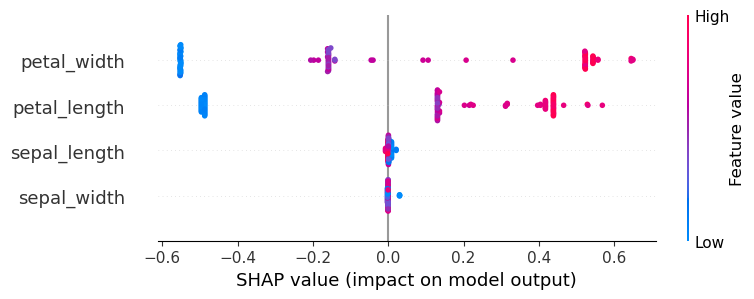

In [555]:
shap.summary_plot(shap_train, X_train)

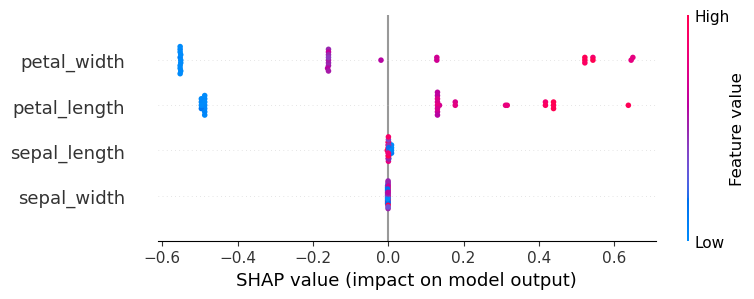

In [556]:
shap.summary_plot(shap_value, X_test)

In [557]:
rfc.feature_importances_

array([0.0010357 , 0.00106487, 0.44458666, 0.55331278])

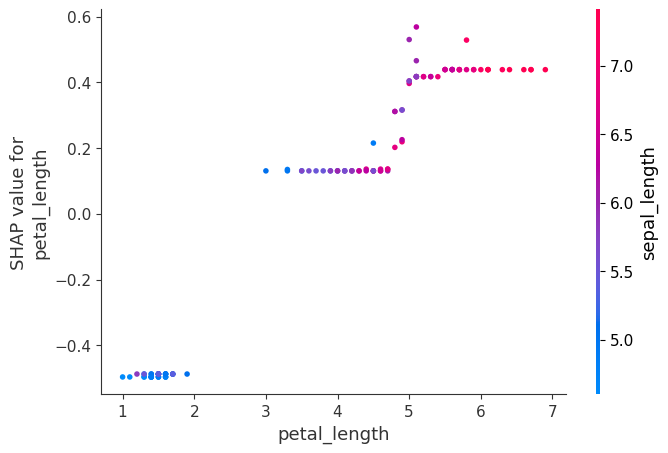

In [558]:
shap.dependence_plot('petal_length', shap_train, X_train, interaction_index='auto')